# 01 Basic Statistics for Machine Learning

This notebook covers fundamental statistical concepts essential for understanding and preparing data in machine learning workflows. These basics help with data exploration, detecting anomalies, and evaluating models.

---

## 1. Descriptive Statistics

Descriptive statistics provide a summary of the central tendency, dispersion, and shape of a dataset’s distribution.

- **Mean:** Average value  
- **Median:** Middle value when data is sorted  
- **Variance:** Measure of data spread  
- **Standard Deviation:** Square root of variance  
- **Quartiles:** Values dividing data into four equal parts

In [ ]:
%pip install pandas

In [4]:
import pandas as pd

# Sample data
data = pd.Series([10, 12, 13, 12, 16, 10, 8, 9, 14, 11])

# Calculate descriptive statistics
mean = data.mean()
median = data.median()
variance = data.var()
std_dev = data.std()
quartiles = data.quantile([0.25, 0.5, 0.75])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Quartiles:\n{quartiles}")

Mean: 11.5
Median: 11.5
Variance: 5.833333333333333
Standard Deviation: 2.41522945769824
Quartiles:
0.25    10.00
0.50    11.50
0.75    12.75
dtype: float64


## 2. Outlier Detection Using IQR Method

Outliers are extreme values that can skew analysis. The Interquartile Range (IQR) method identifies outliers as points lying beyond 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

In [5]:
import pandas as pd
import numpy as np

# Generate example numeric data
np.random.seed(42)
data = pd.Series(np.random.normal(loc=50, scale=10, size=100))

# Add some outliers using pd.concat
outliers_to_add = pd.Series([120, 130, 5, 3])
data = pd.concat([data, outliers_to_add], ignore_index=True)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Outliers:\n{outliers}")

Outliers:
74      23.802549
100    120.000000
101    130.000000
102      5.000000
103      3.000000
dtype: float64


## 3. Correlation Analysis

Correlation analysis measures the strength and direction of the relationship between two variables. Common methods include Pearson’s correlation for linear relationships and Spearman’s rank correlation for monotonic relationships. Correlation helps in feature selection and detecting multicollinearity.

In [ ]:
%pip install seaborn

In [ ]:
%pip install matplotlib

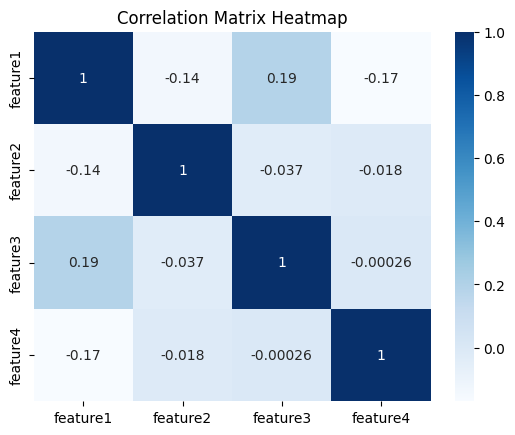

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample dataframe with multiple numeric columns
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.normal(50, 10, 100),
    'feature2': np.random.normal(30, 5, 100),
    'feature3': np.random.normal(100, 20, 100),
    'feature4': np.random.normal(10, 2, 100),
})

# Calculate Pearson correlation matrix
corr_matrix = data.corr(method='pearson')

# Plot heatmap of correlation matrix with annotations
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()


## 4. Hypothesis Testing

Hypothesis testing is used to determine if there is statistical evidence to support a claim about a population based on sample data. Common tests include the t-test for comparing means, chi-square test for categorical data association, and ANOVA for comparing more than two groups.

In [ ]:
%pip install scipy

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Create sample data
np.random.seed(42)
data = pd.DataFrame({
    'group': ['A'] * 50 + ['B'] * 50,
    'value': np.concatenate([
        np.random.normal(100, 10, 50),
        np.random.normal(105, 15, 50)
    ])
})

# Separate groups
group1 = data[data['group'] == 'A']['value']
group2 = data[data['group'] == 'B']['value']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -3.304, P-value: 0.001


## 5. Distribution & Visualization

Understanding the distribution of your data is essential. Visualizations such as histograms, box plots, and Q-Q plots help check data distribution and normality. This informs appropriate modeling techniques and assumptions.

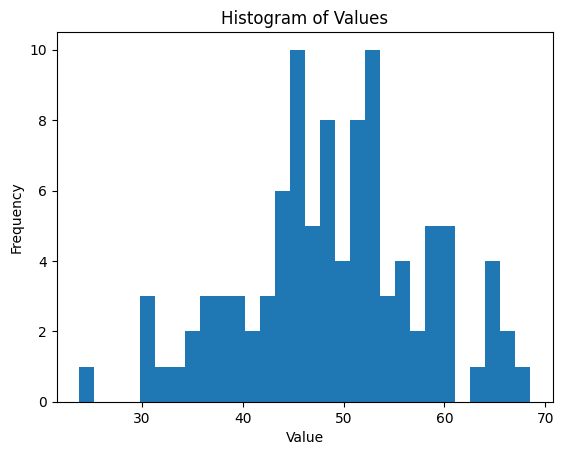

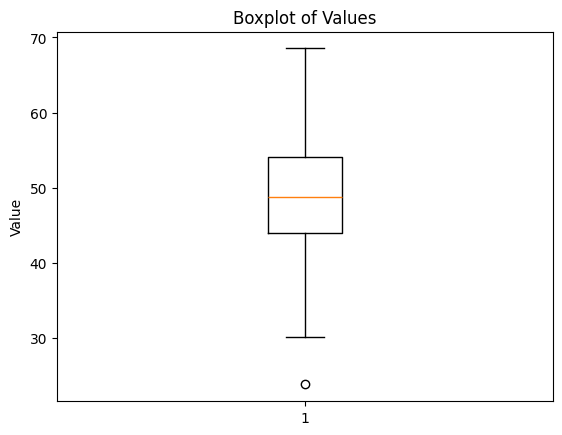

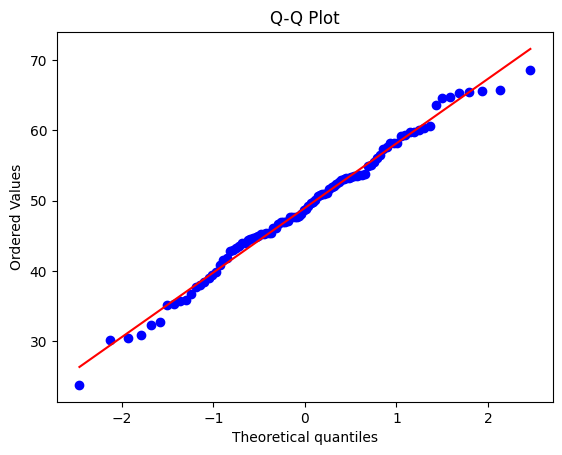

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create sample data with normal distribution plus some noise
np.random.seed(42)
data = pd.DataFrame({
    'value': np.random.normal(loc=50, scale=10, size=100)  # mean=50, std=10, 100 samples
})

# Plot histogram
plt.hist(data['value'], bins=30)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot
plt.boxplot(data['value'])
plt.title('Boxplot of Values')
plt.ylabel('Value')
plt.show()

# Q-Q plot
stats.probplot(data['value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


## 6. Basic Regression Statistics

Basic regression statistics include metrics like **R-squared**, **p-values**, and **confidence intervals** of model coefficients. These help evaluate the goodness of fit and significance of predictors in linear models.

Additionally, ordinary least squares (OLS) regression assumes constant variance of residuals (homoscedasticity). When this assumption is violated (heteroskedasticity), the standard errors can be biased. To handle this, robust standard errors methods such as **HC0**, **HC1**, **HC2**, and **HC3** can be used to adjust standard errors, producing more reliable inference.

- **OLS (Ordinary Least Squares):** A method to estimate linear regression coefficients by minimizing the sum of squared residuals.
- **HC0, HC1, HC3:** Variants of heteroskedasticity-consistent (robust) covariance matrix estimators, with HC3 generally preferred for small samples.

In [ ]:
%pip install statsmodels

In [15]:
import statsmodels.api as sm
import pandas as pd

# Expanded dataset with at least 20 observations to avoid kurtosistest warning
df_reg = pd.DataFrame({
    'feature1': list(range(1, 21)),  # 1 to 20
    'feature2': [2, 1, 4, 3, 5, 7, 6, 8, 9, 10, 11, 13, 12, 14, 15, 17, 16, 18, 19, 20],
    'target': [10, 12, 13, 12, 16, 10, 8, 9, 14, 11, 15, 13, 14, 16, 15, 14, 13, 17, 18, 16]
})

X = df_reg[['feature1', 'feature2']]
y = df_reg['target']
X = sm.add_constant(X)  # Adds intercept term

# Fit OLS regression model with robust standard errors (HC3)
model = sm.OLS(y, X).fit(cov_type='HC3')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     6.575
Date:                Fri, 11 Jul 2025   Prob (F-statistic):            0.00767
Time:                        10:28:33   Log-Likelihood:                -42.637
No. Observations:                  20   AIC:                             91.27
Df Residuals:                      17   BIC:                             94.26
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1698      1.182      8.600      0.0

## 7. Bayesian Statistics (Advanced)

Bayesian statistics involve calculating posterior probabilities using prior knowledge and observed data. Concepts such as prior probability, likelihood, and posterior distribution are fundamental. Bayesian methods are useful for estimating model uncertainty and making probabilistic decisions.

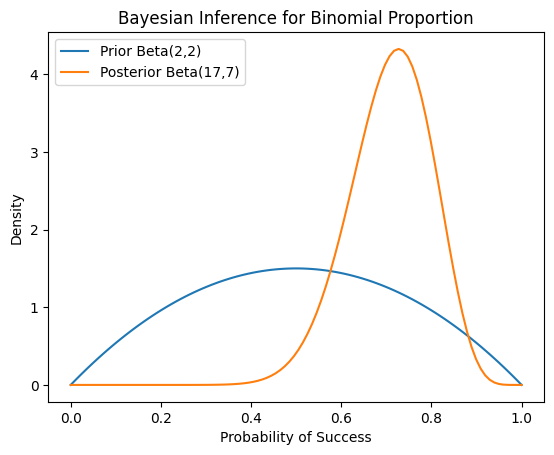

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Observed data: number of successes and trials
successes = 15
trials = 20

# Prior parameters (Beta distribution)
alpha_prior = 2
beta_prior = 2

# Posterior parameters
alpha_post = alpha_prior + successes
beta_post = beta_prior + trials - successes

# Plot prior and posterior distributions
x = np.linspace(0, 1, 100)
prior = beta.pdf(x, alpha_prior, beta_prior)
posterior = beta.pdf(x, alpha_post, beta_post)

plt.plot(x, prior, label='Prior Beta(2,2)')
plt.plot(x, posterior, label=f'Posterior Beta({alpha_post},{beta_post})')
plt.xlabel('Probability of Success')
plt.ylabel('Density')
plt.title('Bayesian Inference for Binomial Proportion')
plt.legend()
plt.show()


## 8. Multivariate Analysis (Advanced)

Multivariate analysis techniques, such as Principal Component Analysis (PCA) and Factor Analysis, are used for dimensionality reduction and feature extraction. These methods help simplify complex datasets and improve model performance.

In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create sample numeric DataFrame with 5 features and 100 samples
np.random.seed(42)
df_numeric = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 100),
    'feature2': np.random.normal(5, 2, 100),
    'feature3': np.random.normal(-3, 5, 100),
    'feature4': np.random.normal(10, 1, 100),
    'feature5': np.random.normal(0, 3, 100)
})

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print('Explained variance ratio:', pca.explained_variance_ratio_)
print(pca_df.head())

Explained variance ratio: [0.29833524 0.20704092]
        PC1       PC2
0 -2.228526 -0.235337
1 -0.900503 -0.227331
2 -0.585616  1.293689
3 -1.309966  1.488751
4  0.212344 -0.832249
